In [8]:
import numpy as np
import os
import pandas as pd
import pickle

In [9]:
clf = pickle.load(open(os.path.join('pkl_objects', 'classifier.pkl'), 'rb'))

In [14]:
d = {'age': [31], 'hypertension': [1], 'heart_disease': [1], 'avg_glucose_level': [107], 'bmi': [27], 'gender_Female': [0], \
     'gender_Male': [1], 'gender_Other': [0], 'ever_married_No': [0], 'ever_married_Yes': [1], 'work_type_Govt_job': [1], \
     'work_type_Never_worked': [0], 'work_type_Private': [0], 'work_type_Self-employed': [0], 'work_type_children': [0], \
     'residence_type_Rural': [0], 'residence_type_Urban': [1], 'smoking_status_formerly smoked': [0], \
     'smoking_status_never smoked': [1], 'smoking_status_smokes': [0]}

In [15]:
X = pd.DataFrame(data=d)

In [16]:
label = {0:'Admission not required', 1:'Admission required'}
print('Prediction: %s\nProbability: %.2f%%' %\
(label[clf.predict(X)[0]], np.max(clf.predict_proba(X))*100))

Prediction: Admission not required
Probability: 100.00%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [18]:
from matplotlib import pyplot as plt
import lightgbm as lgb
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 9

In [19]:
lg = lgb.LGBMClassifier()

In [20]:
# Read training data
df_train = pd.read_csv('train.csv')
df_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,admission_status
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [21]:
#One hot encoding
df_train_ohe = pd.get_dummies(df_train)

In [22]:
# Imputing missing values
from sklearn.preprocessing import Imputer

imr = Imputer(missing_values=np.nan, strategy='mean')

patient_train_data = pd.DataFrame(imr.fit_transform(df_train_ohe))
patient_train_data.columns = df_train_ohe.columns
patient_train_data.index = df_train_ohe.index
patient_train_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,admission_status,gender_Female,gender_Male,gender_Other,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Rural,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,...,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041,0.591359,0.408387,0.000253,...,0.125346,0.004078,0.572212,0.156521,0.141843,0.498710,0.501290,0.172650,0.369885,0.151198
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.638023,0.133103,0.491588,0.491541,0.015918,...,0.331114,0.063732,0.494764,0.363352,0.348893,0.500004,0.500004,0.377949,0.482779,0.358246
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.400000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,28.100000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.600000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# Choose target and features 
y = patient_train_data.admission_status
X = patient_train_data.drop(['id','admission_status'], axis=1)
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Rural,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,3.0,0.0,0.0,95.12,18.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,58.0,1.0,0.0,87.96,39.2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,8.0,0.0,0.0,110.89,17.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,70.0,0.0,0.0,69.04,35.9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,14.0,0.0,0.0,161.28,19.1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [24]:
model = lg.fit(X, y)

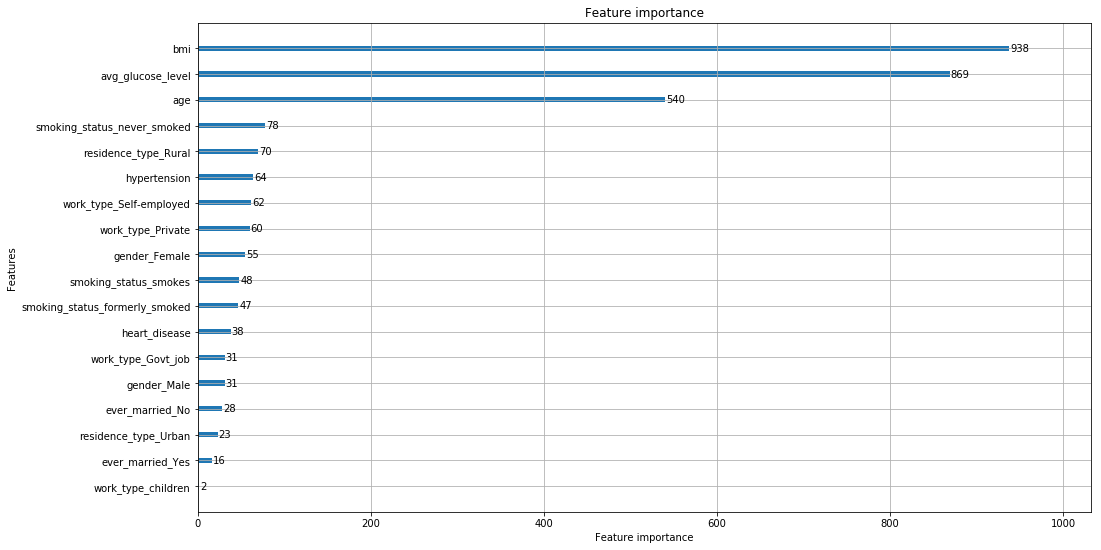

In [25]:
lgb.plot_importance(model)

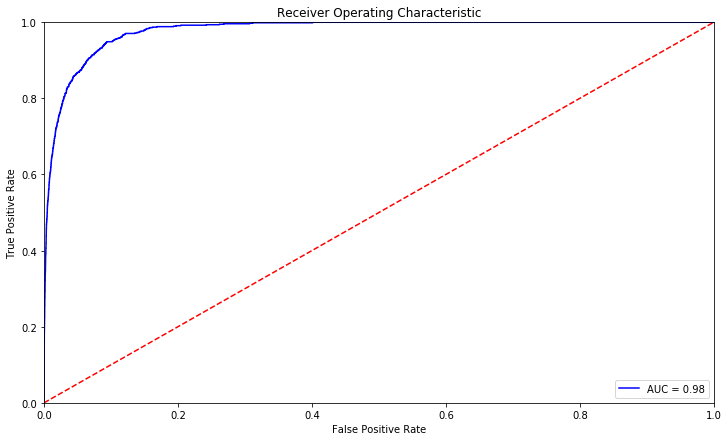

In [29]:
from sklearn.metrics import roc_curve, auc
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y, preds)
roc_auc = auc(fpr, tpr)

rcParams['figure.figsize'] = 12, 7

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
#y_actu = pd.Series([2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2], name='Actual')
#y_pred = pd.Series([0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2], name='Predicted')
df_confusion = pd.crosstab(y, model.predict(X))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [32]:
df_confusion = pd.crosstab(y, model.predict(X), rownames=['Actual'], colnames=['Predicted'], margins=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [33]:
print(df_confusion)

Predicted    0.0  1.0    All
Actual                      
0.0        42616    1  42617
1.0          725   58    783
All        43341   59  43400
